### Basile Álvarez Andrés José
### Keller Ascencio Rodolfo Andrés

# MLP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

## 1.- Preprocesamiento

In [1]:
import pandas as pd

In [ ]:

from google.colab import files
uploaded = files.upload()


In [2]:
fake_df = pd.read_csv('Fake.csv')  
true_df = pd.read_csv('True.csv')  

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


- Agregar etiquetas de clase

In [4]:
fake_df['target'] = 1
true_df['target'] = 0

In [5]:
len(fake_df), len(true_df)

(23481, 21417)

In [6]:
fake_df.tail()

,title,text,subject,date,target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


- Crea un df de los dos archivos

In [7]:
df = pd.concat([true_df, fake_df])
df = df.reset_index(drop=True) # Create id to avoid nan and replicate id bug
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
df.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


- Verifica cadenas vacias

In [9]:
df['text'].isna().sum()

0

In [10]:
len(df)

44898

- Elimina duplicados

In [11]:
df = df.drop_duplicates(subset=['text'])
len(df)

38646

In [12]:
df.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [13]:
df.sort_values(by='text', ascending=True, inplace=False)

,title,text,subject,date,target
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",0
33661,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,politics,"Dec 1, 2016",1
35094,MUSLIM INVASION OF AMERICA In Full Swing: Obam...,(Welcome) to America We hope you enjoy our...,politics,"Jun 17, 2016",1
32062,WOW! MAJOR CREDIT CARD COMPANY Still Sponsorin...,Delta Air Lines and Bank of America became ...,politics,"Jun 12, 2017",1
33502,A MUST WATCH! “It’s Time To Show America Is Bi...,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...,politics,"Dec 21, 2016",1
...,...,...,...,...,...
33499,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,politics,"Dec 21, 2016",1
42714,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,left-news,"Nov 25, 2015",1
36178,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,politics,"Dec 23, 2015",1
38658,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Government News,"Jun 26, 2015",1


In [14]:
df.loc[8970].text

' '

- Elimina cadenas de espacios

In [15]:
df = df[df['text'].str.strip() != '']
df

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44115,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",1
44116,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",1
44117,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",1
44118,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",1


In [16]:
df = df.reset_index(drop=True)

In [17]:
len(df)

38644

- Crea nueva columna añadiendo el título al texto

In [18]:
df['clean_text'] = df['title']+ df['text']

In [19]:
df

,title,text,subject,date,target,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
38639,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",1,The White House and The Theatrics of ‘Gun Cont...
38640,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",1,Activists or Terrorists? How Media Controls an...
38641,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",1,"BOILER ROOM – No Surrender, No Retreat, Heads ..."
38642,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",1,Federal Showdown Looms in Oregon After BLM Abu...


- Elimina puntuación y convierte a minúsculas
- Se utiliza el método __str.translate()__ para eliminar todos los caracteres de puntuación mediante una tabla de traducción creada con el método __str.maketrans__. La constante string.punctuation contiene todos los caracteres de puntuación ASCII, que se eliminan de los valores en la columna

In [20]:
import string

In [21]:
df['clean_text'] = df['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
df.head()

,title,text,subject,date,target,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,as us budget fight looms republicans flip thei...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,us military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,senior us republican senator let mr mueller do...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,trump wants postal service to charge much more...


## 2.- Pipeline

In [22]:
df['target'].value_counts()

0    21191
1    17453
Name: target, dtype: int64

In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import Sequential
from tensorflow.keras import layers 
import re
from sklearn.model_selection import train_test_split

X = df['clean_text'].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [24]:
len(X_train), len(X_test)

(28983, 9661)

In [25]:
raw_train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
raw_val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
for text in raw_train_ds.take(1):
    print(text)

(<tf.Tensor: shape=(), dtype=string, numpy=b'boom republican wins montana election after \xe2\x80\x9cbodyslamming\xe2\x80\x9d reporter \xe2\x80\x98i\xe2\x80\x99m sick and tired of this\xe2\x80\x99this is just too rich the democrats threw tons of money into this race and then the republican candidate  bodyslammed  an obnoxious reporter it seemed like the dems really couldn t lose this one bernie s socialist candidate would win in montana the democrats were sure they could run leftists and win in red states not so fastrepublican businessman greg gianforte won montana s sole house district in a special election thursday keeping a seat in republican hands despite facing assault charges for allegedly attacking a reporter who d asked him about the gop s healthcare billthe best ever quote from the  bodyslamming  incident is when gianforte spoke for all americans  i m sick and tired of this after he won he commented on the incident in his victory speech i shouldn t have treated that reporter t

In [26]:
# Tamaño de vocabulario
vocab_size = 10000

vectorize_layer = TextVectorization(
    standardize=None,
    max_tokens=vocab_size,
    output_mode='tf-idf')

# Obtener el texto sin etiquetas
text_ds = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [27]:
batch_size = 16
train_ds = raw_train_ds.shuffle(20000).batch(batch_size)
val_ds = raw_val_ds.batch(batch_size)

In [28]:
for inp, target in train_ds.take(1):
    print(inp)

tf.Tensor(
[b'german police hunt former raf guerrillas for suspected robberyberlin reuters  german police on monday published videos showing three former members of the red army faction raf militant group taking part in a 2016 armed robbery in northern germany and called for public help to track them down the leftwing militia which arose out of the student protests of the late 1960s was suspected of killing 34 people between 1972 and 1991 the group formally disbanded in 1998 with many members slipping back into ordinary lives  the three former members being sought  two men and a woman aged between 49 and 63  have been on the run for more than 25 years since 2011 they have been suspected of involvement in robberies in which more than 370000 euros have been stolen from supermarkets and money transfer stores the new security camera videos from july 2016 show two men strolling into a supermarket in the central city of hildesheim with their faces covered before they suddenly raise a gun at 

In [29]:
vectorize_layer(inp)

<tf.Tensor: shape=(16, 10000), dtype=float32, numpy=
array([[148.45087  ,  10.473082 ,   2.831915 , ...,   0.       ,
          0.       ,   0.       ],
       [ 84.12216  ,  14.662315 ,  12.743617 , ...,   0.       ,
          0.       ,   0.       ],
       [113.81233  ,  15.36052  ,   7.0797873, ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [331.54028  ,  52.36541  ,  19.823404 , ...,   0.       ,
          0.       ,   0.       ],
       [143.5025   ,  43.986946 ,  16.28351  , ...,   0.       ,
          0.       ,   0.       ],
       [202.88286  ,  25.135397 ,   7.787766 , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)>

## 3.- Modelo

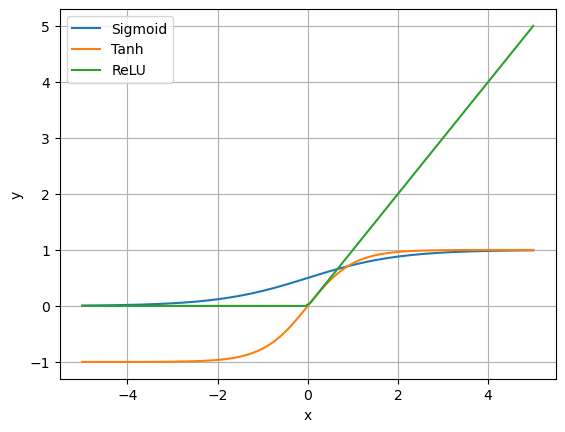

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Datos para graficar
x = np.linspace(-5, 5, 100)

# Graficar las funciones de activación
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')

# Configuraciones del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


- Definir método build y call de la clase Linear(tf.keras.layers.Layer). Utilizar método self.add_weight para crear los pesos "W" y "b". 
- Incluir la opción de función sigmoide, tanh y relu.

In [31]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, num_neurons, activation=None):
        super(Linear, self).__init__()
        self.num_neurons = num_neurons
        self.activation = activation

    def build(self, input_shape):
      self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]),self.num_neurons])

      self.bias = self.add_weight("bias", shape=[1,self.num_neurons])

        
    def call(self, inputs):
      x = tf.matmul(inputs,self.kernel) + self.bias #Primera capa neuronal
      
      
      if self.activation == 'relu':
        x = tf.nn.relu(x)
      elif self.activation == 'tanh':
        x = tf.math.tanh(x)
      else:
        x = tf.math.sigmoid(x)  #Aplicando la función sigmoide
      
      return x


layer = Linear(10)                #Número de neuronas de salida
layer(tf.ones([16,10000])).shape

TensorShape([16, 10])

In [32]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='sigmoid'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.001                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

In [33]:
model(inp)

<tf.Tensor: shape=(16, 1), dtype=float32, numpy=
array([[0.78333604],
       [0.8139965 ],
       [0.7903517 ],
       [0.75371754],
       [0.7618401 ],
       [0.80450034],
       [0.77252746],
       [0.77671665],
       [0.7936211 ],
       [0.84982044],
       [0.75041485],
       [0.8071402 ],
       [0.82495415],
       [0.81543505],
       [0.838269  ],
       [0.83082837]], dtype=float32)>

## 4.- Entrenamiento

### Sigmoide

In [34]:
loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')

loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio

validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')


@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Validation Loss: {validation_loss_epoch:.4f} Validation Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()




Epoch: 0 Loss: 0.2787 Accuracy: 0.4488
Epoch: 0 Validation Loss: 0.2613 Validation Acc: 0.4601
Epoch: 1 Loss: 0.2572 Accuracy: 0.4481
Epoch: 1 Validation Loss: 0.2532 Validation Acc: 0.4425
Epoch: 2 Loss: 0.2516 Accuracy: 0.4974
Epoch: 2 Validation Loss: 0.2509 Validation Acc: 0.5122
Epoch: 3 Loss: 0.2499 Accuracy: 0.5293
Epoch: 3 Validation Loss: 0.2502 Validation Acc: 0.5225
Epoch: 4 Loss: 0.2492 Accuracy: 0.5361
Epoch: 4 Validation Loss: 0.2500 Validation Acc: 0.5289


**Tasa aprendizaje 0.001**

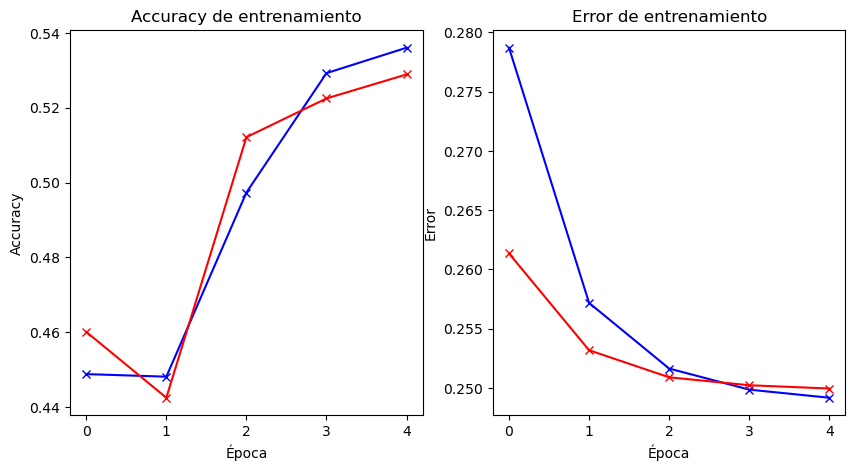

In [35]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.0001**

In [36]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='sigmoid'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.0001                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()


Epoch: 0 Loss: 0.2439 Accuracy: 0.5780
Epoch: 0 Val Loss: 0.2384 Val Acc: 0.6142
Epoch: 1 Loss: 0.2303 Accuracy: 0.6571
Epoch: 1 Val Loss: 0.2215 Val Acc: 0.6974
Epoch: 2 Loss: 0.2151 Accuracy: 0.7245
Epoch: 2 Val Loss: 0.2082 Val Acc: 0.7567
Epoch: 3 Loss: 0.2031 Accuracy: 0.7707
Epoch: 3 Val Loss: 0.1976 Val Acc: 0.7915
Epoch: 4 Loss: 0.1932 Accuracy: 0.7990
Epoch: 4 Val Loss: 0.1888 Val Acc: 0.8134


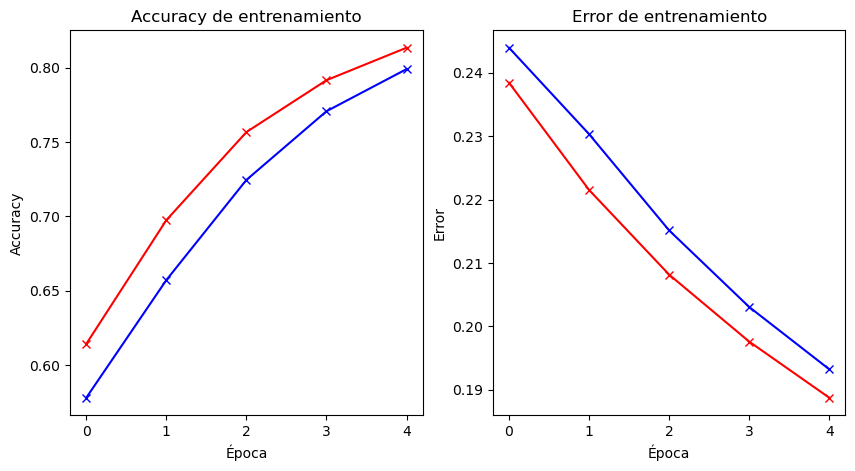

In [37]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.01**

In [38]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='sigmoid'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.01                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.1523 Accuracy: 0.8545
Epoch: 0 Val Loss: 0.1207 Val Acc: 0.8764
Epoch: 1 Loss: 0.0780 Accuracy: 0.9576
Epoch: 1 Val Loss: 0.0571 Val Acc: 0.9724
Epoch: 2 Loss: 0.0480 Accuracy: 0.9750
Epoch: 2 Val Loss: 0.0449 Val Acc: 0.9735
Epoch: 3 Loss: 0.0338 Accuracy: 0.9828
Epoch: 3 Val Loss: 0.0329 Val Acc: 0.9774
Epoch: 4 Loss: 0.0264 Accuracy: 0.9854
Epoch: 4 Val Loss: 0.0245 Val Acc: 0.9859


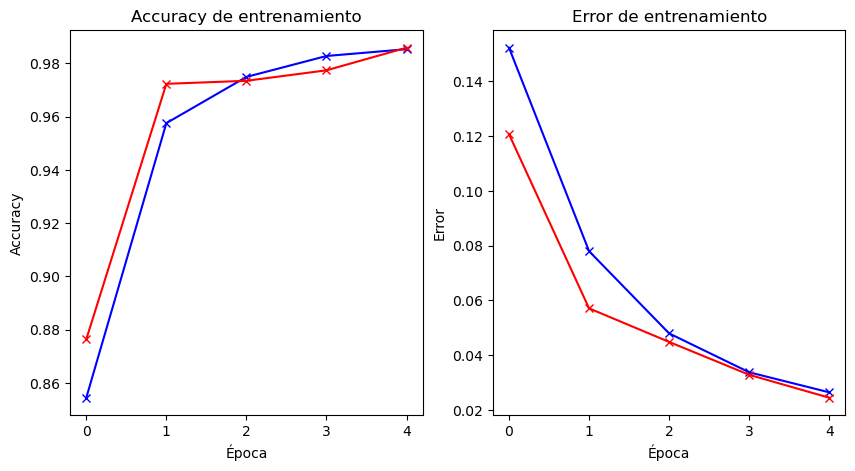

In [39]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.1**

In [40]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='sigmoid'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.1                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2482 Accuracy: 0.5484
Epoch: 0 Val Loss: 0.2485 Val Acc: 0.5422
Epoch: 1 Loss: 0.2445 Accuracy: 0.5645
Epoch: 1 Val Loss: 0.1768 Val Acc: 0.8224
Epoch: 2 Loss: 0.1366 Accuracy: 0.8370
Epoch: 2 Val Loss: 0.0442 Val Acc: 0.9705
Epoch: 3 Loss: 0.1392 Accuracy: 0.7819
Epoch: 3 Val Loss: 0.0385 Val Acc: 0.9696
Epoch: 4 Loss: 0.1508 Accuracy: 0.7931
Epoch: 4 Val Loss: 0.0325 Val Acc: 0.9770


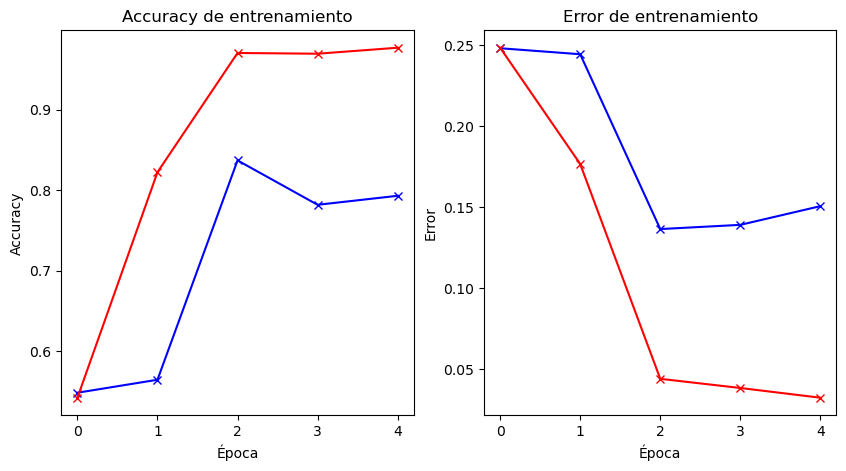

In [41]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

### Tanh

**Tasa aprendizaje 0.0001**

In [42]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='tanh'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.0001                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2302 Accuracy: 0.6222
Epoch: 0 Val Loss: 0.1965 Val Acc: 0.7245
Epoch: 1 Loss: 0.1756 Accuracy: 0.7782
Epoch: 1 Val Loss: 0.1645 Val Acc: 0.8089
Epoch: 2 Loss: 0.1527 Accuracy: 0.8386
Epoch: 2 Val Loss: 0.1475 Val Acc: 0.8523
Epoch: 3 Loss: 0.1391 Accuracy: 0.8709
Epoch: 3 Val Loss: 0.1360 Val Acc: 0.8787
Epoch: 4 Loss: 0.1297 Accuracy: 0.8906
Epoch: 4 Val Loss: 0.1290 Val Acc: 0.8943


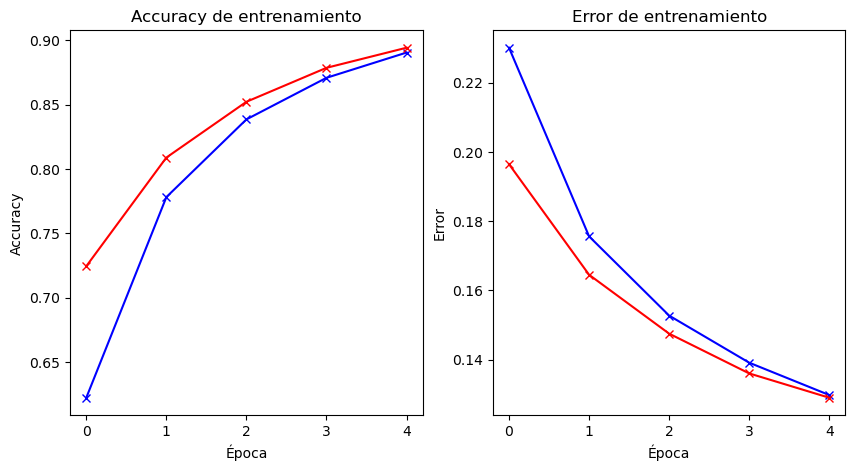

In [43]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.001**

In [44]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='tanh'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.001                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2245 Accuracy: 0.7184
Epoch: 0 Val Loss: 0.1917 Val Acc: 0.8585
Epoch: 1 Loss: 0.1593 Accuracy: 0.8973
Epoch: 1 Val Loss: 0.1307 Val Acc: 0.9197
Epoch: 2 Loss: 0.1090 Accuracy: 0.9369
Epoch: 2 Val Loss: 0.0921 Val Acc: 0.9453
Epoch: 3 Loss: 0.0789 Accuracy: 0.9537
Epoch: 3 Val Loss: 0.0718 Val Acc: 0.9551
Epoch: 4 Loss: 0.0605 Accuracy: 0.9642
Epoch: 4 Val Loss: 0.0569 Val Acc: 0.9625


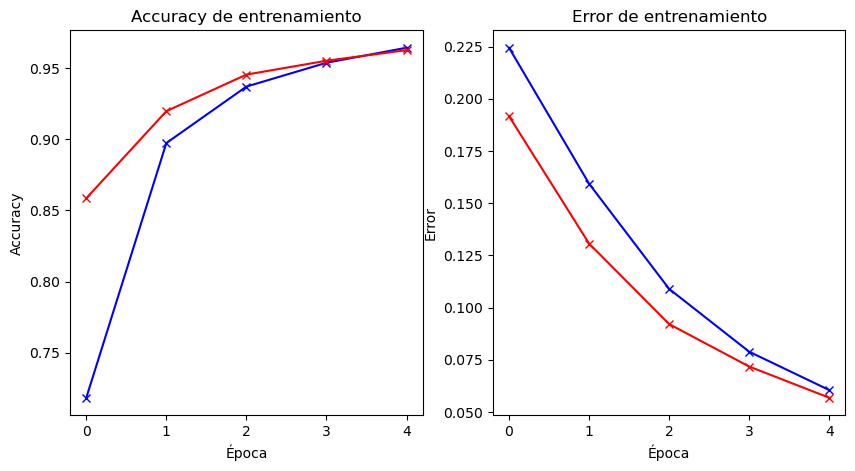

In [45]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.01**

In [46]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='tanh'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.01                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2015 Accuracy: 0.7020
Epoch: 0 Val Loss: 0.2367 Val Acc: 0.5520
Epoch: 1 Loss: 0.0935 Accuracy: 0.9077
Epoch: 1 Val Loss: 0.1128 Val Acc: 0.8589
Epoch: 2 Loss: 0.0620 Accuracy: 0.9364
Epoch: 2 Val Loss: 0.0252 Val Acc: 0.9834
Epoch: 3 Loss: 0.0548 Accuracy: 0.9424
Epoch: 3 Val Loss: 0.1554 Val Acc: 0.8146
Epoch: 4 Loss: 0.0392 Accuracy: 0.9605
Epoch: 4 Val Loss: 0.0295 Val Acc: 0.9711


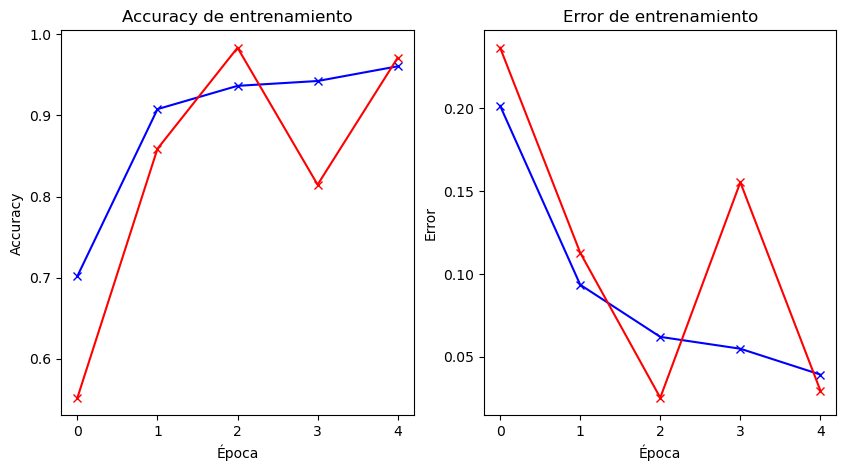

In [47]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.1**

In [48]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='tanh'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.1                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2483 Accuracy: 0.5537
Epoch: 0 Val Loss: 0.2489 Val Acc: 0.5411
Epoch: 1 Loss: 0.2396 Accuracy: 0.5834
Epoch: 1 Val Loss: 0.2522 Val Acc: 0.5290
Epoch: 2 Loss: 0.1909 Accuracy: 0.7170
Epoch: 2 Val Loss: 0.0594 Val Acc: 0.9502
Epoch: 3 Loss: 0.1652 Accuracy: 0.7554
Epoch: 3 Val Loss: 0.2520 Val Acc: 0.5465
Epoch: 4 Loss: 0.1512 Accuracy: 0.7755
Epoch: 4 Val Loss: 0.1721 Val Acc: 0.8107


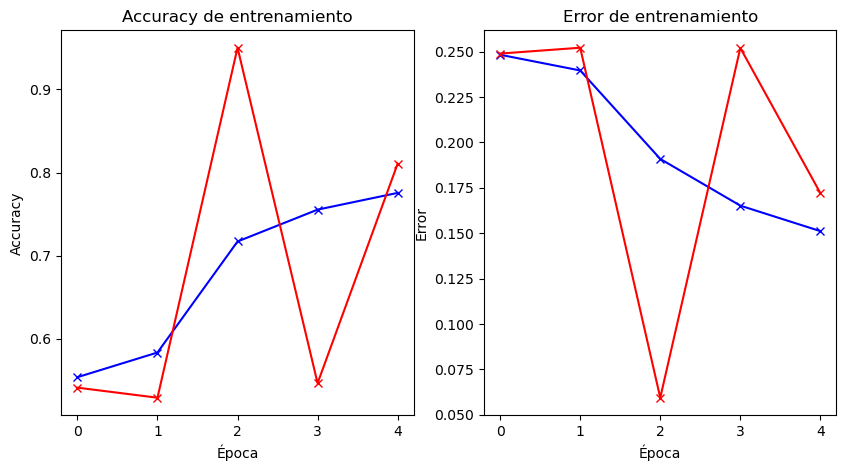

In [49]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

### ReLu

**Tasa aprendizaje 0.0001**

In [50]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='relu'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.0001                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2455 Accuracy: 0.5825
Epoch: 0 Val Loss: 0.1966 Val Acc: 0.6932
Epoch: 1 Loss: 0.1705 Accuracy: 0.7548
Epoch: 1 Val Loss: 0.1532 Val Acc: 0.7980
Epoch: 2 Loss: 0.1393 Accuracy: 0.8271
Epoch: 2 Val Loss: 0.1321 Val Acc: 0.8428
Epoch: 3 Loss: 0.1214 Accuracy: 0.8662
Epoch: 3 Val Loss: 0.1165 Val Acc: 0.8780
Epoch: 4 Loss: 0.1091 Accuracy: 0.8922
Epoch: 4 Val Loss: 0.1086 Val Acc: 0.8938


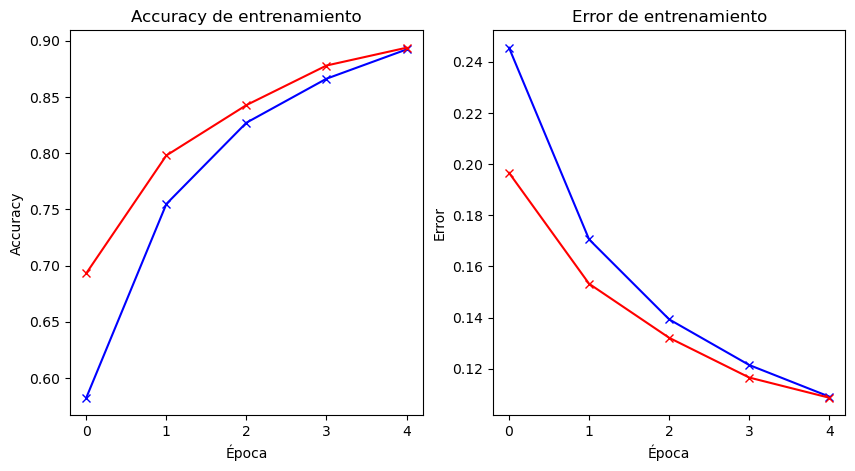

In [51]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.001**

In [58]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='relu'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.001                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.1400 Accuracy: 0.8161
Epoch: 0 Val Loss: 0.0727 Val Acc: 0.9326
Epoch: 1 Loss: 0.0586 Accuracy: 0.9472
Epoch: 1 Val Loss: 0.0499 Val Acc: 0.9526
Epoch: 2 Loss: 0.0404 Accuracy: 0.9666
Epoch: 2 Val Loss: 0.0357 Val Acc: 0.9698
Epoch: 3 Loss: 0.0316 Accuracy: 0.9748
Epoch: 3 Val Loss: 0.0387 Val Acc: 0.9588
Epoch: 4 Loss: 0.0263 Accuracy: 0.9787
Epoch: 4 Val Loss: 0.0283 Val Acc: 0.9757


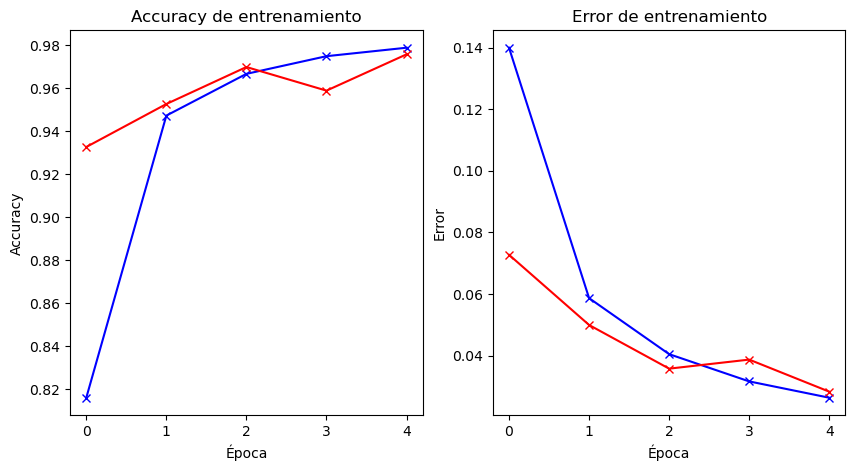

In [59]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.01**

In [54]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='relu'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.01                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2306 Accuracy: 0.5755
Epoch: 0 Val Loss: 0.1359 Val Acc: 0.9339
Epoch: 1 Loss: 0.0988 Accuracy: 0.9296
Epoch: 1 Val Loss: 0.1584 Val Acc: 0.7752
Epoch: 2 Loss: 0.0463 Accuracy: 0.9632
Epoch: 2 Val Loss: 0.0537 Val Acc: 0.9369
Epoch: 3 Loss: 0.0271 Accuracy: 0.9688
Epoch: 3 Val Loss: 0.0317 Val Acc: 0.9633
Epoch: 4 Loss: 0.0195 Accuracy: 0.9786
Epoch: 4 Val Loss: 0.0199 Val Acc: 0.9771


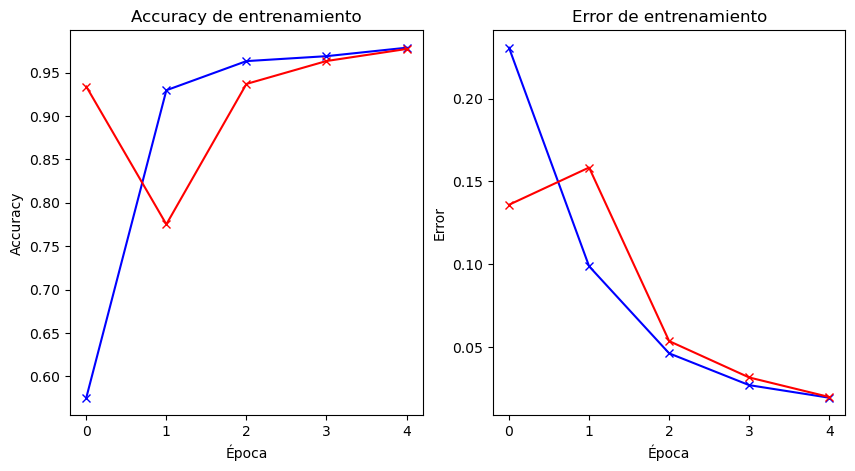

In [55]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

**Tasa aprendizaje 0.1**

In [62]:
model = Sequential([
  vectorize_layer,                  #Vectores TF IDF
  Linear(3, activation='relu'),  #3 neuronas
  Linear(1)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
])

lr = 0.1                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

loss_avg = tf.keras.metrics.Mean(name="loss")
acc_avg = tf.keras.metrics.Accuracy(name='accuracy')
loss_fn = tf.keras.losses.MeanSquaredError()  #Funcion de perdida Error Cuadratico Medio
validation_loss_fn = tf.keras.losses.MeanSquaredError()
validation_loss_avg = tf.keras.metrics.Mean(name="validation_loss")
validation_acc_avg = tf.keras.metrics.Accuracy(name='validation_accuracy')

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch            #Textos x, Etiquetas y

    with tf.GradientTape() as tape:
        output = model(x, training=True) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    optimizer.apply_gradients(zip(grads, model.trainable_weights))  #Aplicamos gradientes al modelo, es la actualizacion de los pesos al modelo
    loss_avg(loss_value)
    acc_avg(y, tf.math.round(output))


#Lo que añadimos

def test_step(batch, model):
    x, y = batch            #Textos x, Etiquetas y

  #No gradient tape
    #with tf.GradientTape() as tape:
    output = model(x, training=False) #Pasamos texto por modelo y nos regresa lotes
        # Compute loss
    loss_value = validation_loss_fn(y, output)

    #grads = tape.gradient(loss_value, model.trainable_weights)      #Se almacenan los gradientes, donde necesitamos perdida y pesos
    validation_loss_avg(loss_value)
    validation_acc_avg(y, tf.math.round(output))
    # print(loss_value,validation_loss_avg,validation_acc_avg)

################ 

     
epochs = 5
loss_train = []
acc_train = []

validation_loss_train = []
validation_acc_train = []

for epoch in range(epochs):
    for batch in train_ds:
        train_step(batch, model, opt)

    loss_epoch = loss_avg.result().numpy()
    acc_epoch = acc_avg.result().numpy()
    print(f'Epoch: {epoch} Loss: {loss_epoch:.4f} Accuracy: {acc_epoch:.4f}')
    loss_train.append(loss_epoch)
    acc_train.append(acc_epoch)

    
    #Lo que añadimos
    for batch in val_ds:
        test_step(batch, model)
    validation_loss_epoch = validation_loss_avg.result().numpy()
    validation_acc_epoch = validation_acc_avg.result().numpy()
    print(f'Epoch: {epoch} ' f'Val Loss: {validation_loss_epoch:.4f} Val Acc: {validation_acc_epoch:.4f}')
    validation_loss_train.append(validation_loss_epoch)
    validation_acc_train.append(validation_acc_epoch)
    ################

    
    
    # Reset metrics
    loss_avg.reset_states()
    acc_avg.reset_states()
    validation_loss_avg.reset_states()
    validation_acc_avg.reset_states()

Epoch: 0 Loss: 0.2530 Accuracy: 0.5409
Epoch: 0 Val Loss: 0.2402 Val Acc: 0.5401
Epoch: 1 Loss: 0.1735 Accuracy: 0.7703
Epoch: 1 Val Loss: 0.0443 Val Acc: 0.9576
Epoch: 2 Loss: 0.0679 Accuracy: 0.9249
Epoch: 2 Val Loss: 0.0531 Val Acc: 0.9372
Epoch: 3 Loss: 0.0376 Accuracy: 0.9589
Epoch: 3 Val Loss: 0.0206 Val Acc: 0.9772
Epoch: 4 Loss: 0.0436 Accuracy: 0.9519
Epoch: 4 Val Loss: 0.0141 Val Acc: 0.9853


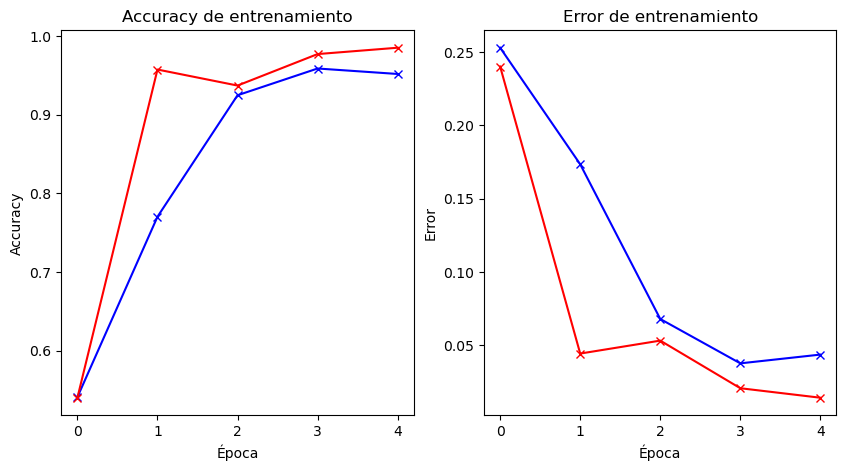

In [63]:
import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(acc_train, 'bx-', label = 'train')
ax1.plot(validation_acc_train, 'rx-', label='test')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(loss_train, 'bx-', label = 'train')
ax2.plot(validation_loss_train, 'rx-', label='test')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.show()

## Ejercicio
- Agregar loop para evaluación
- Agregar activación relu y tanh
- Probar con las siguientes tasas de aprendizaje: 0.1, 0.01, 0.001, 0.0001

Darle opción para pasar diferentes funciones de activación, (un if para sigmoide, para tangente y para relu)

Cada que acaba una época escribir for batch in abrir conjunto de prueba y definir la función

Plotea 